## IMPORT THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## IMPORT THE DATASET

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head().T

,0,1,2,3,4
CustomerID,1,2,3,4,5
Gender,Male,Male,Female,Female,Female
Age,19,21,20,23,31
Annual Income (k$),15,15,16,16,17
Spending Score (1-100),39,81,6,77,40


In [4]:
data.tail().T

,195,196,197,198,199
CustomerID,196,197,198,199,200
Gender,Female,Female,Male,Male,Male
Age,35,45,32,32,30
Annual Income (k$),120,126,126,137,137
Spending Score (1-100),79,28,74,18,83


## EXPLORATORY DATA ANALYSIS

In [5]:
data.shape

(200, 5)

In [6]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Data visualisation

#### univariate variables

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score (1-100), Length: 84, dtype: int64

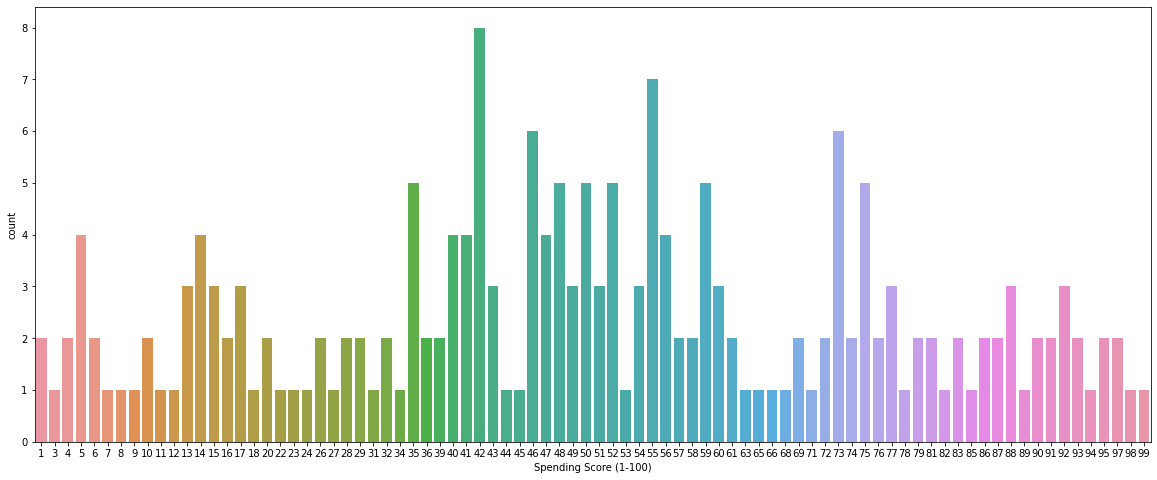

In [8]:
plt.figure(figsize = (20,8))
sns.countplot(x=data['Spending Score (1-100)'] )
data['Spending Score (1-100)'].value_counts()

<AxesSubplot:ylabel='Gender'>

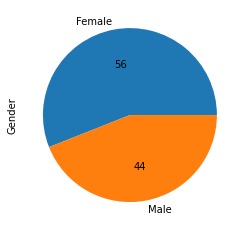

In [9]:
data['Gender'].value_counts().plot(kind='pie',autopct='%.0f')

<AxesSubplot:xlabel='Spending Score (1-100)'>

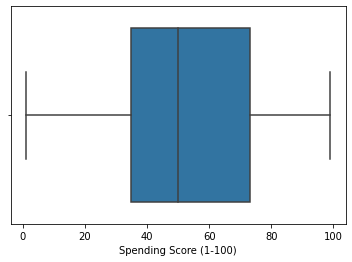

In [10]:
sns.boxplot(x = data['Spending Score (1-100)'])

<AxesSubplot:xlabel='Annual Income (k$)'>

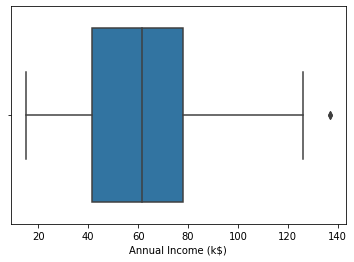

In [11]:
sns.boxplot(x = data['Annual Income (k$)'])

#### Bivariate analysis

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

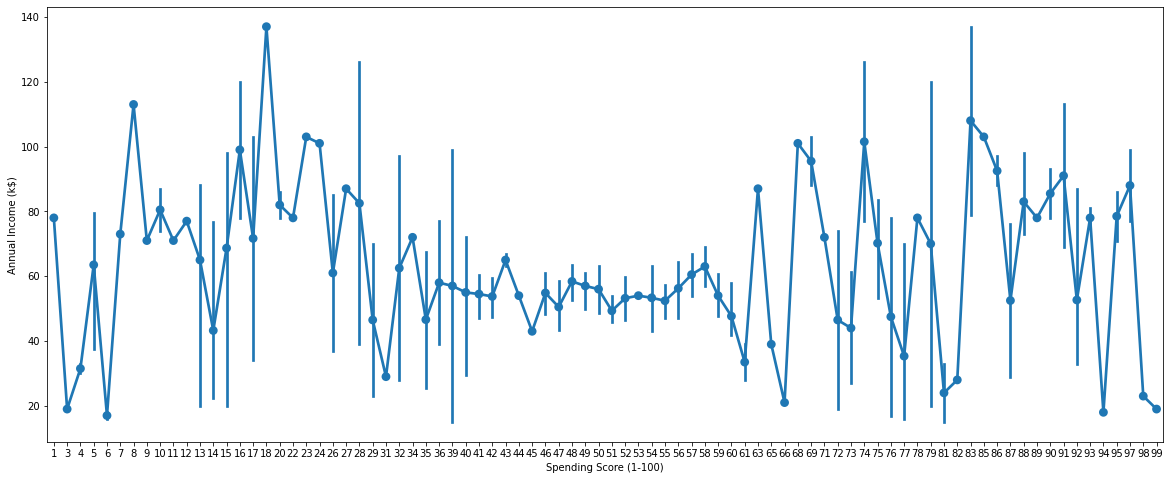

In [12]:
plt.figure(figsize = (20,8))
sns.pointplot(x='Spending Score (1-100)',y='Annual Income (k$)',data=data)

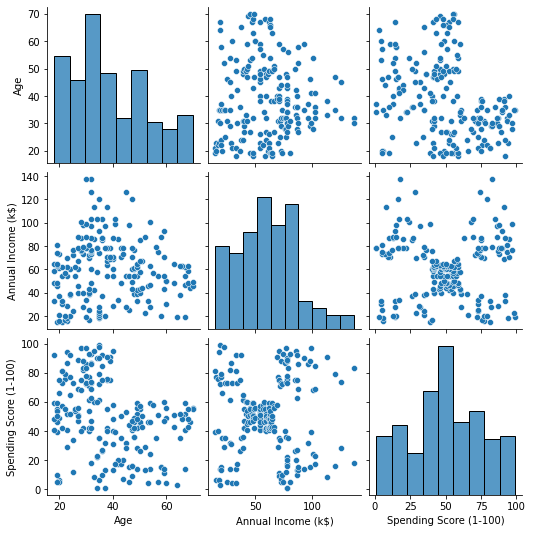

In [13]:
sns.pairplot(data.iloc[:,1:])

#### Multivariate analysis

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

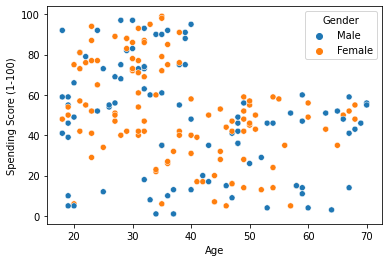

In [14]:
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=data,hue='Gender')

### check for duplicate values

In [15]:
data.duplicated().sum()

0

In [16]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [17]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### check for missing values

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [19]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

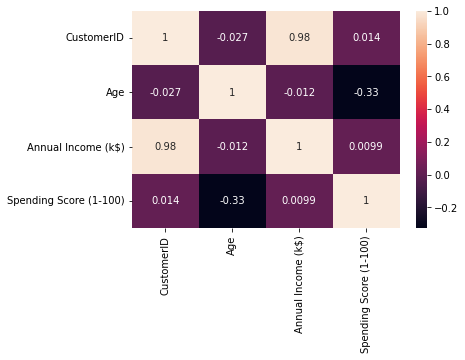

In [20]:
sns.heatmap(data.corr(), annot=True)

# SCALING

In [21]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
ndataset = data.iloc[:,2:]
ndataset = mms.fit_transform(ndataset)

In [22]:
ndataset

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918],
       [0.07692308, 0.01639344, 0.76530612],
       [0.32692308, 0.02459016, 0.05102041],
       [0.09615385, 0.02459016, 0.94897959],
       [0.88461538, 0.03278689, 0.02040816],
       [0.23076923, 0.03278689, 0.7244898 ],
       [0.94230769, 0.03278689, 0.13265306],
       [0.32692308, 0.03278689, 1.        ],
       [0.76923077, 0.04098361, 0.14285714],
       [0.11538462, 0.04098361, 0.7755102 ],
       [0.36538462, 0.04098361, 0.12244898],
       [0.07692308, 0.04098361, 0.79591837],
       [0.32692308, 0.04918033, 0.34693878],
       [0.03846154, 0.04918033, 0.66326531],
       [0.65384615, 0.06557377, 0.28571429],
       [0.32692308, 0.06557377, 0.98979592],
       [0.32692308, 0.07377049, 0.34693878],
       [0.13461538, 0.07377049, 0.73469388],
       [0.

## Kmeans clustering algorithm 

In [23]:
from sklearn.cluster import KMeans
TWSS = []
k = list(range(2,9))

for i in k:
    kmeans = KMeans(n_clusters=i, init = 'k-means++')
    kmeans.fit(ndataset)
    TWSS.append(kmeans.inertia_)

In [24]:
TWSS

[22.56077488260975,
 17.370109472896694,
 12.65028767622991,
 10.303964892534122,
 8.385099035848988,
 7.14021543303523,
 6.338804281532605]

Text(0, 0.5, 'TWSS')

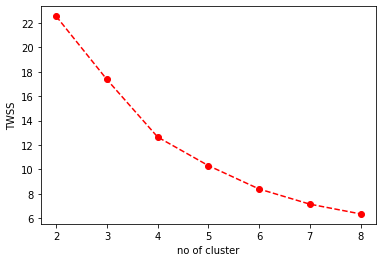

In [25]:
plt.plot(k,TWSS,'ro--')
plt.xlabel('no of cluster')
plt.ylabel('TWSS')

In [26]:
model = KMeans(n_clusters=4)
model.fit(ndataset)

KMeans(n_clusters=4)

In [27]:
mb = pd.Series(model.labels_)

In [28]:
data['clust'] = mb

In [29]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,3
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3


In [30]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2
199,200,Male,30,137,83,1


## Add the cluster data with primary dataset

In [31]:
data.to_csv('Kmeans_cluster.csv', encoding='utf-8')

In [32]:
import os
os.getcwd()

'D:\\nalaiyathiran'

## split the data into dependent and independent variables

In [33]:
dataset = pd.read_csv('Kmeans_cluster.csv')

In [34]:
dataset.head()

,Unnamed: 0,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
0,0,1,Male,19,15,39,3
1,1,2,Male,21,15,81,3
2,2,3,Female,20,16,6,3
3,3,4,Female,23,16,77,3
4,4,5,Female,31,17,40,3


In [35]:
dataset.drop(columns=['Unnamed: 0','CustomerID'],inplace=True)

In [36]:
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
0,Male,19,15,39,3
1,Male,21,15,81,3
2,Female,20,16,6,3
3,Female,23,16,77,3
4,Female,31,17,40,3


0    65
3    57
1    40
2    38
Name: clust, dtype: int64

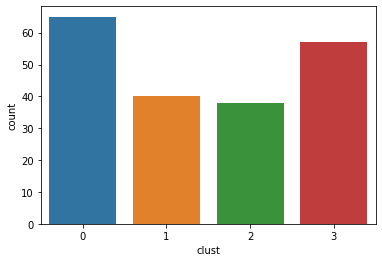

In [37]:
sns.countplot(x=dataset['clust'] )
dataset['clust'].value_counts()

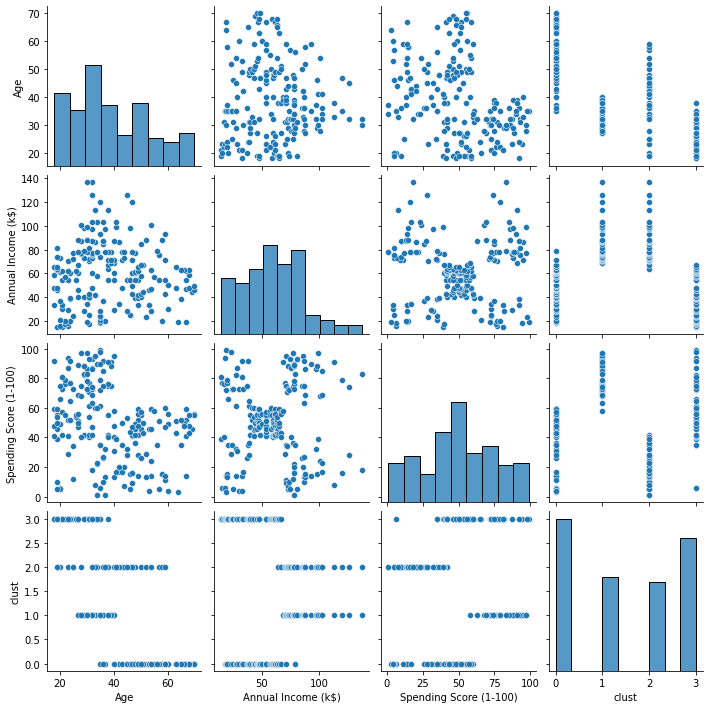

In [38]:
sns.pairplot(dataset.iloc[:,:])

In [39]:
dataset['Gender'].replace({'Male' : 1,'Female' : 0 }, inplace=True)

In [40]:
X = dataset.iloc[:,:-1]
y = dataset['clust']

In [41]:
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [42]:
y

0      3
1      3
2      3
3      3
4      3
      ..
195    1
196    2
197    1
198    2
199    1
Name: clust, Length: 200, dtype: int64

## split the data into training and testing

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Build and train the model 

### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)


c:\users\micro\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

## Test the model

In [45]:
log_pred = reg.predict(X_test)
log_pred

array([1, 0, 1, 2, 0, 0, 0, 1, 3, 0, 2, 3, 0, 2, 2, 0, 3, 1, 3, 0, 0, 3,
       3, 3, 3, 0, 0, 1, 3, 0, 2, 3, 2, 2, 3, 0, 3, 3, 1, 1], dtype=int64)

## Measure the performance using evaluation metrics

In [46]:
from sklearn import metrics
metrics.confusion_matrix(y_test,log_pred)

array([[13,  0,  0,  0],
       [ 0,  7,  0,  0],
       [ 0,  0,  7,  0],
       [ 0,  0,  0, 13]], dtype=int64)

In [47]:
metrics.accuracy_score(y_test, log_pred)

1.0

### Decision Tree classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

dtree_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test, dtree_pred)

0.975

In [50]:
confusion_matrix(y_test, dtree_pred)

array([[12,  0,  1,  0],
       [ 0,  7,  0,  0],
       [ 0,  0,  7,  0],
       [ 0,  0,  0, 13]], dtype=int64)

### Random forest classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)
rf_pred

array([1, 0, 1, 2, 0, 0, 0, 1, 3, 0, 2, 3, 0, 2, 2, 0, 3, 1, 3, 0, 0, 3,
       3, 3, 3, 0, 0, 1, 3, 2, 2, 3, 2, 2, 3, 0, 3, 3, 1, 1], dtype=int64)

In [52]:
accuracy_score(y_test, rf_pred)

0.975

In [53]:
confusion_matrix(y_test,rf_pred)

array([[12,  0,  1,  0],
       [ 0,  7,  0,  0],
       [ 0,  0,  7,  0],
       [ 0,  0,  0, 13]], dtype=int64)

### KNeighbors classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

knn_pred = knn.predict(X_test)
knn_pred

array([1, 0, 0, 2, 0, 0, 0, 1, 3, 0, 2, 3, 0, 2, 2, 0, 3, 1, 3, 0, 0, 3,
       3, 3, 3, 0, 0, 1, 3, 2, 2, 3, 2, 2, 3, 0, 3, 3, 1, 1], dtype=int64)

In [55]:
accuracy_score(y_test,knn_pred)

0.95

In [56]:
confusion_matrix(y_test,knn_pred)

array([[12,  0,  1,  0],
       [ 1,  6,  0,  0],
       [ 0,  0,  7,  0],
       [ 0,  0,  0, 13]], dtype=int64)